In [1]:
import math
import nltk
import numpy as np
import pandas as pd
from pymorphy2 import MorphAnalyzer
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
import re

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Задание 1
#### Факт 1.
Главной героине первого советского телесериала присвоили звание Героя Советского Союза по настоянию зрителей

"После показа этого фильма ветераны Великой Отечественной войны, общественные организации обратились к руководству СССР с предложением присвоить Анне Морозовой звание Героя Советского Союза."

#### Факт 2.
«Выхино» — самая загруженная станция Московского метрополитена: согласно измерениям 2002 года, суточный пассажиропоток на станции составлял 174 250 человек.

"Является одной из самых загруженных станций московского метро"
Странно то, что ни в одной ссылке точных чисел (174 250) не было.

####  Факт 3.
Официальное действие старых советских паспортов на территории России было прекращено 1 июля 2004 года, а, например, в Приднестровье советские паспорта до сих пор являются законным документом, удостоверяющим личность

"С распадом СССР в Российской Федерации Министерством внутренних дел Российской Федерации была предпринята попытка осуществить обмен паспортов гражданина СССР в срок до 1 июля 2004 года."

# Задание 2
1. Установить морфологический анализатор
* Выбрать текст
* Сделать частотный список лемм
* Выдать по мере снижения частоты

In [3]:
morph = MorphAnalyzer()
def tokenize(sentence):
    sentence = sentence.lower()
    text_list = nltk.word_tokenize(sentence)
    text_list = [word for word in text_list if len(word) > 1]
    text_list = [morph.parse(word)[0].normal_form for word in text_list]
    return text_list

In [4]:
filename = 'data/task2.txt'
with open(filename, 'r') as fin:
    file_text = fin.read()
print ('Первые 1000 символов:')
print (file_text[:1000])
print ('~~~~~~~~~~~~~~~~~~~~~~~~~~')
file_text = file_text.replace('.', ' ')
lemms = np.array(tokenize(file_text))
values, count = np.unique(lemms, return_counts=True)
unique_values = [(x,y) for x,y in zip(values, count)]
unique_values.sort(key=lambda x: x[1], reverse=True)
for i in unique_values[:15]:
    print ('{1}\t{0}'.format(i[0], i[1]))

Первые 1000 символов:
                                                  Леону Верту

     Прошу детей  простить  меня  за  то,  что  я  посвятил  эту  книжку
взрослому.  Скажу в оправдание: этот взрослый - мой самый лучший друг. И
еще: он понимает все на свете, даже детские книжки. И, наконец, он живет
во  Франции,  а  там  сейчас  голодно и холодно.  И он очень нуждается в
утешении. Если же все это меня не оправдывает, я посвящу эту книжку тому
мальчику,  каким  был  когда-то  мой  взрослый  друг.  Ведь все взрослые
сначала были детьми,  только мало кто из них об  этом  помнит.  Итак,  я
исправляю посвящение:

                                                  Леону Верту,
                                        когда он был маленьким




I



     Когда  мне  было  шесть  лет,  в  книге  под  названием  "Правдивые
истории",  где  рассказывалось  про  девственные  леса, я увидел однажды
удивительную  картинку.   На  картинке  огромная  змея  - удав - глотала
хищного зверя.
     В  книг

# Задание 3.1
![title](./data/img/task3_1.png)
Запрос - "сar insurance"
1. Вычислить вес каждого документа
2. Представить запрос как вектор
3. Представить документ как вектор
4. Вычислить сходство  запроса и документа

Вектор документа нормализуется, вектор запроса не нормализуется
Показать, какие веса у документов по отношению к запросу и как упорядочатся документы

<br \>

In [5]:
idf = np.array([1.65, 2.08, 1.62, 1.5])
query = np.array([1, 0, 1, 0]) * idf
d1 = normalize((np.array([27, 3, 0, 14]) * idf).reshape(1,-1))[0]
d2 = normalize((np.array([4, 33, 33, 0]) * idf).reshape(1,-1))[0]
d3 = normalize((np.array([24, 0, 29, 17]) * idf).reshape(1,-1))[0]
print ('query:\t{}'.format(query))
print ('d1:\t{}'.format(d1))
print ('d2:\t{}'.format(d2))
print ('d3:\t{}'.format(d3))

query:	[ 1.65  0.    1.62  0.  ]
d1:	[ 0.89736877  0.12569206  0.          0.42300212]
d2:	[ 0.07564262  0.78668324  0.61270521  0.        ]
d3:	[ 0.59526798  0.          0.70620428  0.3833165 ]


In [6]:
docs = {'d1': d1, 'd2': d2, 'd3': d3}
print ('cosine similarity')
for i in sorted(docs.items(), key=lambda x:cosine_similarity(x[1].reshape(1,-1), query.reshape(1,-1)), reverse=True):
    print ('{0} : {1}'.format(i[0], cosine_similarity(i[1].reshape(1,-1), query.reshape(1,-1))[0][0]))

cosine similarity
d3 : 0.9195214992872569
d1 : 0.6403300253625415
d2 : 0.48323104205732087


# Задача 3.2

Запросы – это проанализированные вами факты из Википедии.
<br />
Документы – это предложения из статей Википедии, указанных в этих фактах
<br />
Все должно быть обработано морфологическим анализатором
<br />
Нужно найти наиболее релевантные предложения 
1. По векторной модели без idf
2. По tf.idf (idf в данном случае – это количество предложений, в которых встречалось  слово)


Нормализация запроса и предложения, т.е. выстроить все предложения из статей по мере сходства с запросом по векторной модели. <br\>
В отчете должны быть показаны веса выдаваемых предложений.

In [7]:
def doc_parse(doc_name):
    with open(doc_name, 'r') as fin:
        file = fin.read()
    file = file.replace('\n', '')
    sentences = file.split('.')
    query, answer = None, None
    if sentences[0][0] == '*':
        query = sentences[0][1:]
    if sentences[1][0] == '#':
        answer = sentences[1][1:]
    return query, answer, sentences[2:]
def tf_idf(query, sentences, use_idf=False):
    tfs = TfidfVectorizer(tokenizer=tokenize, use_idf=use_idf)
    sentences.append(query)
    docs_vec = tfs.fit_transform(sentences)
    query_vec = docs_vec[-1]
    docs_vec = docs_vec[:-1]
    return query_vec, docs_vec
def print_all(filename, use_idf=False):
    query, answer, sentences = doc_parse(filename)
    query_vec, sentences_vec = tf_idf(query, sentences, use_idf)
    sentences_cos_similarity = [cosine_similarity(query_vec, x)[0][0] for x in sentences_vec]
    common_list = [(k,v) for k,v in zip(sentences,sentences_cos_similarity)]
    common_list = sorted(common_list, key=lambda x:x[1], reverse=True)
    print ('~~~~~~~~~~~~~~~~~~~~~~~~~~')
    if use_idf:
        print ('~~~~~~~~with idf~~~~~~~~~~')
    else:
        print ('~~~~~~without idf~~~~~~~~~')
    print ('Query: {}'.format(query))
    print ('Answer: {}'.format(answer))
    print ('~~~~~~~~~~~~~~~~~~~~~~~~~~')
    for i in common_list[:5]:
        print ('{0:.5f} {1}'.format(i[1], i[0]))
    print ('\n\n')

In [8]:
files = ['data/task3/facts.txt', 'data/task3/facts2.txt','data/task3/facts3.txt']
for file in files:
    print_all(file, use_idf=False)

~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~without idf~~~~~~~~~
Query: Главной героине первого советского телесериала присвоили звание Героя Советского Союза по настоянию зрителей
Answer: После показа этого фильма ветераны Великой Отечественной войны, общественные организации обратились к руководству СССР с предложением присвоить Анне Морозовой звание Героя Советского Союза
~~~~~~~~~~~~~~~~~~~~~~~~~~
0.35541  После показа картины ветераны войны и общественные организации обратились к руководству СССР с предложением посмертно присвоить Анне Морозовой звание Героя Советского Союза
0.33806  После показа этого фильма ветераны Великой Отечественной войны, общественные организации обратились к руководству СССР с предложением присвоить Анне Морозовой звание Героя Советского Союза
0.30984 Показ первого советского телесериала (4 серии) «Вызываем огонь на себя» режиссёра Сергея Колосова с Людмилой Касаткиной в главной роли начался 16 февраля 1965 года по первой программе телевидения
0.14907  Работала по с

In [9]:
files = ['data/task3/facts.txt', 'data/task3/facts2.txt','data/task3/facts3.txt']
for file in files:
    print_all(file, use_idf=True)

~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~with idf~~~~~~~~~~
Query: Главной героине первого советского телесериала присвоили звание Героя Советского Союза по настоянию зрителей
Answer: После показа этого фильма ветераны Великой Отечественной войны, общественные организации обратились к руководству СССР с предложением присвоить Анне Морозовой звание Героя Советского Союза
~~~~~~~~~~~~~~~~~~~~~~~~~~
0.30126  После показа картины ветераны войны и общественные организации обратились к руководству СССР с предложением посмертно присвоить Анне Морозовой звание Героя Советского Союза
0.28616  После показа этого фильма ветераны Великой Отечественной войны, общественные организации обратились к руководству СССР с предложением присвоить Анне Морозовой звание Героя Советского Союза
0.27183 Показ первого советского телесериала (4 серии) «Вызываем огонь на себя» режиссёра Сергея Колосова с Людмилой Касаткиной в главной роли начался 16 февраля 1965 года по первой программе телевидения
0.10160  Работала по с

# Задача 4.1
Эксперт нашел 20 релевантных документов. Система нашла 4 документа в следующей последовательности релевантных и нерелевантных документов: 
* RNRNNRRNNNN

Какова средняя  точность поиска – Average Precision

In [10]:
R = [1/1, 2/3, 3/6, 4/7]
all = 20
print ('average precision: {}'.format(sum(R) / all))

average precision: 0.13690476190476192


# Задача 4.2
При разметке релевантных документов эксперты использовали шкалу от 0 (нерелевантные документы) до 4 баллов.

При тестировании систем выяснилось, что системы выдали следующие результаты поиска ответов на запрос:
* Система 1: 4, 2, 3, 1, 2, 0 (и далее 0)
* Система 2: 3, 2, 4, 4, 4., далее 0.

Какая система ищет лучше по мере NDCG.

In [11]:
def dcg(vec):
    dcg = vec[0]
    for i in range(1, len(vec)):
        dcg += vec[i] / math.log(i+1)
    return dcg

число idcg будет одинаковым, по-этому сравним лишь dcg для каждой системы.

In [12]:
system_1 = [4, 2, 4, 1, 2]
system_2 = [3, 2, 4, 4, 4]
dcg1 = dcg(system_1)
dcg2 = dcg(system_2)
print('system 1: {}'.format(dcg(system_1)))
print('system 2: {}'.format(dcg(system_2)))

system 1: 12.490364377848982
system 2: 14.897076808301652


Вывод: Система 2 лучше по мере NDCG

# Задача 5.1
Запрос: *отбор кандидатов*
Пользователь отметил релевантными два документа
* *Кандидат отобрать претендент*
* *Отбор выбрать претендент*

Объем коллекции – 1 млн.документов
Df: 
* отбор -      70000
* кандидат -   70000
* Претендент - 30000
* отобрать -   50000
* выбрать -    70000

Как изменится запрос, если
* alpha=0.7 (коэффициент учета запроса) 
* beta=0.3 (коэффициент учета релевантных документов)

Запрос представляется как вектор частот
<br \>
Документ представляется как нормализованный вектор tf-idf

Найдем вектора запроса и документов:

|          |отбор|кандидат|претендент|отобрать|выбрать
|----------|-----|--------|----------|--------|-------|
|запрос	   |  1  |   1    |    0     |   0    |   0   |
|документ 1|  0  |   1    |    1     |   1    |   0   |
|документ 2|  1  |   0    |    1     |   0    |   1   |

Посчитаем idf для каждого слова:

* $idf_{отбор}$ = 1.15
* $idf_{кандидат}$ = 1.15
* $idf_{претендент}$ = 1.52
* $idf_{отобрать}$ = 1.3
* $idf_{выбрать}$ = 1.15

In [13]:
idf_vector = np.array([1.15, 1.15,1.52, 1.3, 1.15])
query = np.array([1,1,0,0,0])
doc1 = np.array([0,1,1,1,0])
doc2 = np.array([1,0,1,0,1])

print ('docs tf-idf')
print ('doc1: {}'.format(doc1 * idf_vector))
print ('doc2: {}'.format(doc2 * idf_vector))

doc1 = normalize((doc1 * idf_vector).reshape(1,-1))[0]
doc2 = normalize((doc2 * idf_vector).reshape(1,-1))[0]

print ('~~~~~~~~~~~~')
print ('normalize docs')
print ('doc1: {}'.format(doc1))
print ('doc2: {}'.format(doc2))

docs tf-idf
doc1: [ 0.    1.15  1.52  1.3   0.  ]
doc2: [ 1.15  0.    1.52  0.    1.15]
~~~~~~~~~~~~
normalize docs
doc1: [ 0.          0.49845239  0.65882403  0.56346792  0.        ]
doc2: [ 0.51660485  0.          0.68281685  0.          0.51660485]


Рассчитаем новый вектор запроса по формуле:
$\alpha * Запрос  + \beta * \frac{1}{2} * \sum_{i=1}^{2}{документ_i}$
<br \>при 
* $\alpha = 0.7$
* $\beta = 0.3$

In [14]:
print ('new_query: {}'.format(0.7 * query + 0.3 * 0.5 * doc1 + 0.3 * 0.5 * doc2))

new_query: [ 0.77749073  0.77476786  0.20124613  0.08452019  0.07749073]


# Задача 5.2
* Запросы по Википедии
Для каждого запроса сделать идеальную разметку, т.е. разметить предложения, насколько они релевантны запросу
* Использовать трехбалльную шкалу {2,1, 0}
* Оценить качество выдачи, используя NDCG
* Идеальное расположение предложений с оценками
* Расчет NDCG для каждого запроса и варианта выдачи
* Найти среднее для метода с idf и без idf

$IDCG_{facts.txt} = 2 + \dfrac{2}{log(2)} + \dfrac{1}{log(3)} + \dfrac{1}{log(4)} = 6.517$
<br\>
<br\>
$IDCG_{facts2.txt} = 2 + \dfrac{1}{log(2)} + \dfrac{1}{log(3)} + \dfrac{1}{log(4)} = 5.074$
<br \>
<br\>
$IDCG_{facts3.txt} = 2 = 2.000$

In [15]:
IDCG_dict = {'data/task5/facts.txt': 6.517, 'data/task5/facts2.txt': 5.074, 'data/task5/facts3.txt': 2.000}
def doc_parse_ndcg(doc_name):
    with open(doc_name, 'r') as fin:
        file = fin.read()
    file = file.replace('\n', '')
    sentences = file.split('.')
    query, answer = None, None
    if sentences[0][0] == '*':
        query = sentences[0][1:]
    new_sentences = []
    for sentence in sentences[1:]:
        r = 0
        sentence = sentence.strip()
        if len(sentence) > 0 and sentence[0] == '(':
            r = int(sentence[1])
            sentence = sentence[3:]
        new_sentences.append((sentence, r))
    return query, new_sentences

def tf_idf_ndcg(query, sentences, use_idf=False):
    tfs = TfidfVectorizer(tokenizer=tokenize, use_idf=use_idf)
    sentences.append((query,0))
    docs_vec = tfs.fit_transform([x[0] for x in sentences])
    query_vec = docs_vec[-1]
    docs_vec = docs_vec[:-1]
    return query_vec, [(x,y[1]) for x,y in zip(docs_vec,sentences)]

def print_ndcg(filename, use_idf=False):
    query, sentences = doc_parse_ndcg(filename)
    query_vec, sentences_vec = tf_idf_ndcg(query, sentences, use_idf)
    sentences_cos_similarity = [cosine_similarity(query_vec, x[0])[0][0] for x in sentences_vec]
    common_list = [(k,v) for k,v in zip(sentences,sentences_cos_similarity)]
    common_list = sorted(common_list, key=lambda x:x[1], reverse=True)
    print ('~~~~~~~~~~~~~~~~~~~~~~~~~~')
    if use_idf:
        print ('~~~~~~~~with idf~~~~~~~~~~')
    else:
        print ('~~~~~~without idf~~~~~~~~~')
    print ('Query: {}'.format(query))
    print ('~~~~~~~~~~~~~~~~~~~~~~~~~~')
    ndcg = common_list[0][0][1]
    for idx, i in enumerate(common_list[:10]):
        if idx > 0:
            ndcg += i[0][1] / math.log(idx+1)
        print ('({2}) {0:.5f} {1}'.format(i[1], i[0][0],i[0][1]))
    ndcg = ndcg / IDCG_dict[filename]
    print ('~~~~~~~~~~~~~~~~~~~~~~~~~~\nNDCG = {}'.format(ndcg))
    print ('\n\n')

In [16]:
files = ['data/task5/facts.txt', 'data/task5/facts2.txt','data/task5/facts3.txt']
for file in files:
    print_ndcg(file, use_idf=False)

~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~without idf~~~~~~~~~
Query: Главной героине первого советского телесериала присвоили звание Героя Советского Союза по настоянию зрителей
~~~~~~~~~~~~~~~~~~~~~~~~~~
(2) 0.35541 После показа картины ветераны войны и общественные организации обратились к руководству СССР с предложением посмертно присвоить Анне Морозовой звание Героя Советского Союза
(2) 0.33806 После показа этого фильма ветераны Великой Отечественной войны, общественные организации обратились к руководству СССР с предложением присвоить Анне Морозовой звание Героя Советского Союза
(0) 0.30984 Показ первого советского телесериала (4 серии) «Вызываем огонь на себя» режиссёра Сергея Колосова с Людмилой Касаткиной в главной роли начался 16 февраля 1965 года по первой программе телевидения
(0) 0.14907 Работала по специальности
(0) 0.13801 Целью советского командования является аэродром, который будет играть ключевую роль в будущем наступлении немецких войск
(0) 0.12910 Советские диверсанты несут

In [17]:
files = ['data/task5/facts.txt', 'data/task5/facts2.txt','data/task5/facts3.txt']
for file in files:
    print_ndcg(file, use_idf=True)

~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~with idf~~~~~~~~~~
Query: Главной героине первого советского телесериала присвоили звание Героя Советского Союза по настоянию зрителей
~~~~~~~~~~~~~~~~~~~~~~~~~~
(2) 0.30126 После показа картины ветераны войны и общественные организации обратились к руководству СССР с предложением посмертно присвоить Анне Морозовой звание Героя Советского Союза
(2) 0.28616 После показа этого фильма ветераны Великой Отечественной войны, общественные организации обратились к руководству СССР с предложением присвоить Анне Морозовой звание Героя Советского Союза
(0) 0.27183 Показ первого советского телесериала (4 серии) «Вызываем огонь на себя» режиссёра Сергея Колосова с Людмилой Касаткиной в главной роли начался 16 февраля 1965 года по первой программе телевидения
(0) 0.10160 Работала по специальности
(0) 0.07445 Целью советского командования является аэродром, который будет играть ключевую роль в будущем наступлении немецких войск
(0) 0.07179 Речь в фильме идёт о реаль

In [18]:
NDCG_arr = np.array([0.6069561537803363, 0.5807628312469977, 0.228499744749743])
NDCG_arr_idf = np.array([0.6069561537803363, 0.5464826396126844, 0.2543848247941093])
print ('average ndcg without idf: {}'.format(NDCG_arr.mean()))
print ('average ndcg with idf: {}'.format(NDCG_arr_idf.mean()))

average ndcg without idf: 0.47207290992569234
average ndcg with idf: 0.46927453939571


# Задача 6
Встретилось слово hodtel.
<br \>Какое исходно слово наиболее вероятно: hotel, hostel?
* Ошибка od|o встречалась 9 раз
* Ошибка d|s- встречалась 7 раз
* Hotel встречается в пять раз чаще, чем hostel
* Буква o встречается в корпусе в 1.2 раза чаще, чем буква s

Два варианта расчета: 
1. Без сглаживания
* Сглаживание по Лапласу

Без сглаживания:

$p_{hotel} = (9 * 5) / (n * 1.2) = 37.5 / n$
<br\>
$p_{hostel} = (7 * 1) / (n * 1) = 7 / n$

Наиболее вероятный: hotel

Со сглаживанием по Лапласу:

$p_{hotel} = ((9 + 1) * 5) / (n * 1.2 + 26) = 50 / (1.2n + 26)$
<br\>
$p_{hostel} = ((7 + 1) * 1) / (n * 1 + 26) = 8 / (n + 26)$

Наиболее вероятный: hotel

# Задание 7.1
Даны документы и их классы С1 и С2
* D1=(X1,X2, X3) - C1
* D2=(X1, X2, X4) - C1		
* D3=(X4, X5, X6) - C2	

Определить класс документа на основе метода наивного Байеса 
<br\>
D4=(X1, X4, X5)

Метод наивного Байеса:

Вычисление вероятностей:

$P(C1) = 2 / 3 = 0.67$
<br\>
$P(X1 | C1) = (2 + 1) / 12 = 0.25$
<br\>
$P(X4 | C1) = (1 + 1) / 12 = 0.17$
<br\>
$P(X5 | C1) = (0 + 1) / 12 = 0.08$

$P(C2) = 1 / 3 = 0.33$
<br\>
$P(X1 | C2) = (0 + 1) / 9 = 0.11$
<br\>
$P(X4 | C2) = (1 + 1) / 9 = 0.22$
<br\>
$P(X5 | C2) = (1 + 1) / 9 = 0.22$

$score_{C1} = 0.67 * 0.25 * 0.17 * 0.08 = 0.002278$
<br\>
$score_{C2} = 0.33 * 0.11 * 0.22 * 0.22 = 0.001757$

D4 принадлежит классу C1

# Задание 7.2
* Зайти news.yandex.ru
* Набрать 10 разных текстов из рубрики Политика
* И 10 текстов из другой рубрики, например, Спорт (или другая)

Итого – 20 текстов в двух рубриках
<br\>
Система классификации методом Байеса
<br\>
Можно задать текст и система будет классифицировать
<br\>
Показывать полученные веса классов для текущего документа

In [19]:
label2name = {0: 'politic', 1: 'sport'}
tfs = TfidfVectorizer(tokenizer=tokenize)
filepath = 'data/task7'
news = []
for idx in range(10):
    file = filepath + '/politic/politic' + str(idx) + '.txt'
    with open(file, 'r') as fin:
        text = fin.read()
    news.append(text)
for idx in range(10):
    file = filepath + '/sport/sport' + str(idx) + '.txt'
    with open(file, 'r') as fin:
        text = fin.read()
    news.append(text)
assert len(news) == 20, 'Error'
X_train = tfs.fit_transform(news)
y_train = np.append(np.zeros(10), np.ones(10))
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [20]:
test_politic_1 = 'Савченко заявила о договорённости с Донбассом по обмену всеми пленным. Народный депутат Украины Надежда Савченко заявила о достижении договорённости с руководством Донецкой и Луганской народных республик об обмене пленными по формуле "4 на 1".'
test_politic_2 = 'Путин возглавил рейтинг Forbes самых влиятельных людей мира. Президент России Владимир Путин возглавил рейтинг самых влиятельных людей, составленный журналом Forbes. Он опубликован на сайте журнала.'
test_sport_1 = 'Женская сборная России по гандболу завершила выступление на ЧЕ. Заключительная встреча с командой Венгрии, которая ничего не решала для россиянок, закончилась вничью — 26:26 Женская сборная России по гандболу сыграла вничью с командой Венгрии в последнем матче второго группового этапа чемпионата Европы, который проходит в Швеции.'
test_sport_2 = 'Третий этап розыгрыша Кубка мира по биатлону стартует в четверг в чешском городе Нове- Место-на-Мораве. Впервые в сезоне пройдут гонки с масс- старта среди мужчин и женщин, участники также будут соревноваться в спринте и гонках преследования.'

test_arr = [test_politic_1, test_politic_2, test_sport_1, test_sport_2]

for test_sentence in test_arr:
    print ('~~~~~~~~~~~~~~~~~~~~~~~~~')
    print (test_sentence)
    test_vec = tfs.transform([test_sentence])
    proba_arr = model.predict_proba(test_vec)
    label = proba_arr.argmax()
    weight = proba_arr.max()
    print ('class: {0}, proba: {1:.5f}'.format(label2name[label], weight))

~~~~~~~~~~~~~~~~~~~~~~~~~
Савченко заявила о договорённости с Донбассом по обмену всеми пленным. Народный депутат Украины Надежда Савченко заявила о достижении договорённости с руководством Донецкой и Луганской народных республик об обмене пленными по формуле "4 на 1".
class: politic, proba: 0.98218
~~~~~~~~~~~~~~~~~~~~~~~~~
Путин возглавил рейтинг Forbes самых влиятельных людей мира. Президент России Владимир Путин возглавил рейтинг самых влиятельных людей, составленный журналом Forbes. Он опубликован на сайте журнала.
class: politic, proba: 0.98606
~~~~~~~~~~~~~~~~~~~~~~~~~
Женская сборная России по гандболу завершила выступление на ЧЕ. Заключительная встреча с командой Венгрии, которая ничего не решала для россиянок, закончилась вничью — 26:26 Женская сборная России по гандболу сыграла вничью с командой Венгрии в последнем матче второго группового этапа чемпионата Европы, который проходит в Швеции.
class: sport, proba: 1.00000
~~~~~~~~~~~~~~~~~~~~~~~~~
Третий этап розыгрыша Кубка ми

# Задание 8
![title](./data/img/task8_1.png)
* Single-link
* complete link

Косинусная мера сходства

Координаты точек:
* a (0.6, 1.9)
* b (1.8, 1.6)
* c  (2.7, 2.0)
* d (3.0, 2.1)
* e (3.0, 2.6)
* f (3.1, 4.5)
* g (3.8, 0.6)
* h (4.2, 2.7)

Выполнить кластеризацию и показать на рисунке.

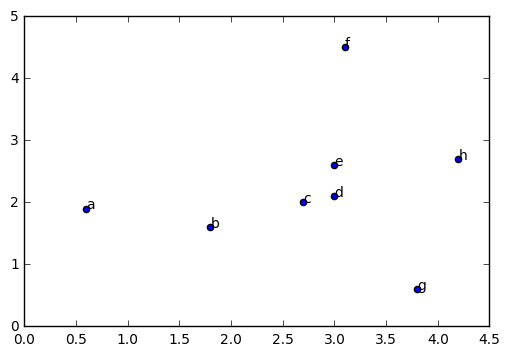

In [21]:
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
x = [0.6, 1.8, 2.7,3.0,3.0,3.1,3.8,4.2]
y = [1.9, 1.6, 2.0, 2.1, 2.6, 4.5, 0.6,2.7]
fig, ax = plt.subplots()
ax.scatter(x, y)
for i, label in enumerate(labels):
    ax.annotate(label, (x[i],y[i]))
plt.show()

In [22]:
points = [(x,y) for x,y in zip(x,y)]
array_cos = np.zeros((len(points), len(points)))
for idx in range(len(labels)):
    for idy in range(len(labels)):
        if idx == idy:
            array_cos[idx,idy] = 0.0
        else:
            array_cos[idx,idy] = 1-cosine_similarity(points[idx], points[idy])[0][0]
cos_data = pd.DataFrame(array_cos, index=labels, columns=labels)

In [23]:
cos_data

,a,b,c,d,e,f,g,h
a,0.000000,0.141406,0.190425,0.206460,0.147908,0.043884,0.553830,0.231038
b,0.141406,0.000000,0.003966,0.006711,0.000079,0.028882,0.158121,0.012036
c,0.190425,0.003966,0.000000,0.000360,0.002928,0.053963,0.113443,0.002191
d,0.206460,0.006711,0.000360,0.000000,0.005337,0.062995,0.101354,0.000776
e,0.147908,0.000079,0.002928,0.005337,0.000000,0.031953,0.151414,0.010172
f,0.043884,0.028882,0.053963,0.062995,0.031953,0.000000,0.311201,0.077477
g,0.553830,0.158121,0.113443,0.101354,0.151414,0.311201,0.000000,0.084777
h,0.231038,0.012036,0.002191,0.000776,0.010172,0.077477,0.084777,0.000000


In [24]:
np.sort(np.unique(array_cos.reshape(1,-1)[0]))

array([  0.00000000e+00,   7.87708252e-05,   3.59710638e-04,
         7.75626071e-04,   2.19116866e-03,   2.92790138e-03,
         3.96620509e-03,   5.33737943e-03,   6.71078392e-03,
         1.01719490e-02,   1.20355796e-02,   2.88821088e-02,
         3.19533498e-02,   4.38840252e-02,   5.39633843e-02,
         6.29948423e-02,   7.74770595e-02,   8.47771092e-02,
         1.01354386e-01,   1.13442743e-01,   1.41405769e-01,
         1.47907904e-01,   1.51413658e-01,   1.58120861e-01,
         1.90425049e-01,   2.06459820e-01,   2.31037710e-01,
         3.11200533e-01,   5.53830381e-01])

### Single-link
#### Iteration 1
|          |     a    |     b    |     c    |     d     |     e    |     f     |    g    |     h    |
|----------|----------|----------|----------|-----------|----------|-----------|---------|----------|
|    a     |----------|  0.1414  |  0.1904  |    0.2064 |   0.1479 |    0.0439 |   0.5538|  0.2310  |
|    b     |----------|----------|   0.0039 |    0.0067 |  0.00008 | 0.0289    |  0.1581 |  0.0120  |
|    c     |----------|----------|----------|    0.0003 |   0.0029 |0.053963   |0.113443 | 0.002191 |
|    d     |----------|----------|----------|-----------| 0.005337 | 0.062995  |0.101354 |0.000776  |
|    e     |----------|----------|----------|-----------|----------| 0.031953  |0.151414 |0.010172  |
|    f     |----------|----------|----------|-----------|----------|-----------|0.311201 |0.077477  |
|    g     |----------|----------|----------|-----------|----------|-----------|---------|0.084777  |

#### Iteration 2
|          |     a    |     b,e  |     c    |     d     |    f     |    g    |     h    |
|----------|----------|----------|----------|-----------|----------|---------|----------|
|    a     |----------|  0.1414  |  0.1904  |    0.2064 |   0.0439 |   0.5538|  0.2310  |
|    b,e   |----------|----------|  0.002928|   0.005337|0.028882  | 0.151414| 0.010172 |
|    c     |----------|----------|----------|    0.0003 |0.053963  |0.113443 | 0.002191 |
|    d     |----------|----------|----------|-----------|0.062995  |0.101354 |0.000776  |
|    f     |----------|----------|----------|-----------|----------|0.311201 |0.077477  |
|    g     |----------|----------|----------|-----------|----------|---------|0.084777  |

#### Iteration 3
|          |     a    |     b,e  |     c,d  |    f     |    g    |     h    |
|----------|----------|----------|----------|----------|---------|----------|
|    a     |----------|  0.1414  |  0.1904  |   0.0439 |   0.5538|  0.2310  |
|    b,e   |----------|----------|  0.002928|0.028882  | 0.151414| 0.010172 |
|    c,d   |----------|----------|----------|0.053963  |0.101354 |0.000776  |
|    f     |----------|----------|----------|----------|0.311201 |0.077477  |
|    g     |----------|----------|----------|----------|---------|0.084777  |

#### Iteration 4
|          |     a    |     b,e  |   c,d,h  |    f     |    g    |
|----------|----------|----------|----------|----------|---------|
|    a     |----------|  0.1414  |  0.1904  |   0.0439 |   0.5538|
|    b,e   |----------|----------|  0.002928|0.028882  | 0.151414|
|    c,d,h |----------|----------|----------|0.053963  |0.084777 |
|    f     |----------|----------|----------|----------|0.311201 |
|    g     |----------|----------|----------|----------|---------|

#### Iteration 5
|          |     a    |b,e,c,d,h |    f     |    g    |
|----------|----------|----------|----------|---------|
|    a     |----------|  0.1904  |   0.0439 |   0.5538|
|b,e,c,d,h |----------|----------|0.028882  |0.084777 |
|    f     |----------|----------|----------|0.311201 |
|    g     |----------|----------|----------|---------|

#### Iteration 6
|           |     a    |b,e,c,d,h,f|    g    |
|-----------|----------|-----------|---------|
|    a      |----------| 0.0439    |   0.5538|
|b,e,c,d,h,f|----------|-----------|0.084777 |
|    g      |----------|-----------|---------|

#### Iteration 7
|             |a,b,c,d,e,f,h|    g    |
|-------------|-------------|---------|
|a,b,c,d,e,f,h|-------------|0.084777 |
|    g        |-------------|---------|

![title](./data/img/single-link.png)

### Complete-link
#### Iteration 1
|          |     a    |     b    |     c    |     d     |     e    |     f     |    g    |     h    |
|----------|----------|----------|----------|-----------|----------|-----------|---------|----------|
|    a     |----------|  0.1414  |  0.1904  |    0.2064 |   0.1479 |    0.0439 |   0.5538|  0.2310  |
|    b     |----------|----------|   0.0039 |    0.0067 |  0.00008 | 0.0289    |  0.1581 |  0.0120  |
|    c     |----------|----------|----------|    0.0003 |   0.0029 |0.053963   |0.113443 | 0.002191 |
|    d     |----------|----------|----------|-----------| 0.005337 | 0.062995  |0.101354 |0.000776  |
|    e     |----------|----------|----------|-----------|----------| 0.031953  |0.151414 |0.010172  |
|    f     |----------|----------|----------|-----------|----------|-----------|0.311201 |0.077477  |
|    g     |----------|----------|----------|-----------|----------|-----------|---------|0.084777  |

#### Iteration 2
|          |     a    |     b,e  |     c    |     d     |    f     |    g    |     h    |
|----------|----------|----------|----------|-----------|----------|---------|----------|
|    a     |----------|  0.1479  |  0.1904  |    0.2064 |   0.0439 |   0.5538|  0.2310  |
|    b,e   |----------|----------| 0.0039   |   0.0067  |0.031953  | 0.1581  | 0.0120   |
|    c     |----------|----------|----------|    0.0003 |0.053963  |0.113443 | 0.002191 |
|    d     |----------|----------|----------|-----------|0.062995  |0.101354 |0.000776  |
|    f     |----------|----------|----------|-----------|----------|0.311201 |0.077477  |
|    g     |----------|----------|----------|-----------|----------|---------|0.084777  |

#### Iteration 3
|          |     a    |     b,e  |     c,d  |    f     |    g    |     h    |
|----------|----------|----------|----------|----------|---------|----------|
|    a     |----------|  0.1479  |  0.2064  |   0.0439 |   0.5538|  0.2310  |
|    b,e   |----------|----------| 0.0067   |0.031953  | 0.1581  | 0.0120   |
|    c,d   |----------|----------|----------|0.062995  |0.113443 | 0.002191 |
|    f     |----------|----------|----------|----------|0.311201 |0.077477  |
|    g     |----------|----------|----------|----------|---------|0.084777  |

#### Iteration 4
|          |     a    |     b,e  |   c,d,h  |    f     |    g    |
|----------|----------|----------|----------|----------|---------|
|    a     |----------|  0.1479  |  0.2310  |   0.0439 |   0.5538|
|    b,e   |----------|----------| 0.0120   |0.031953  | 0.1581  |
|    c,d,h |----------|----------|----------|0.077477  |0.113443 |
|    f     |----------|----------|----------|----------|0.311201 |
|    g     |----------|----------|----------|----------|---------|

#### Iteration 5
|          |     a    | b,e,c,d,h|    f     |    g    |
|----------|----------|----------|----------|---------|
|    a     |----------|  0.2310  |   0.0439 |   0.5538|
|b,e,c,d,h |----------|----------|0.077477  | 0.1581  |
|    f     |----------|----------|----------|0.311201 |
|    g     |----------|----------|----------|---------|

#### Iteration 6
|          |     a,f  | b,e,c,d,h|    g    |
|----------|----------|----------|---------|
|    a,f   |----------|  0.2310  |   0.5538|
|b,e,c,d,h |----------|----------| 0.1581  |
|    g     |----------|----------|---------|

#### Iteration 7
|           |     a,f  |b,e,c,d,h,g|
|-----------|----------|-----------|
|    a,f    |----------|     0.5538|
|b,e,c,d,h,g|----------|-----------|

![title](./data/img/complete-link.png)

# Задание 9
![title](./data/img/task9.png)
Дан веб-граф, составить матрицу переходов. 
<br\>
Коэффициент телепортации = 0.1.
<br\>
Составить матрицу переходов и вычислить pagerank для узлов сети
<br \>
Начальный вектор состояний можно взять с равными вероятностями для каждого состояния

$d = 0.1$
$(1 - d) = 0.9$
<br />
начальный вектор состояний:
* $v = (0.33, 0.33, 0.33)$


Составим матрицу переходов P:

|    | d1 | d2 | d3 |
|----|----|----|----|
| d1 |  0 |  1 |  1 |
| d2 |  0 |  0 |  1 |
| d3 |  0 |  1 |  0 |


Нормализуем строки:

|    | d1 | d2 | d3 |
|----|----|----|----|
| d1 |  0 | 1/2| 1/2|
| d2 |  0 |  0 |  1 |
| d3 |  0 |  1 |  0 |


Умножаем на (1-d):

|    | d1 | d2 | d3 |
|----|----|----|----|
| d1 |  0 |0.45|0.45|
| d2 |  0 |  0 | 0.9|
| d3 |  0 |0.9 |  0 |


К каждой строке добавляем 0.1/3 = 1/30 = 0.033

|    |  d1  |  d2  |  d3  |
|----|------|------|------|
| d1 |0.033 |0.483 |0.483 | 
| d2 |0.033 |0.033 |0.933 |
| d3 | 0.033|0.933 | 0.033|


In [25]:
P = np.array([[0.033,0.483,0.483], [0.033,0.033,0.933],[0.033,0.933,0.033]])
#Посчитаем vP, vP^2 и тд:
newP = P
#10 раз
for _ in range(10):
    newP = newP.dot(P)
print (newP)

[[ 0.03267148  0.47819168  0.47819168]
 [ 0.03267148  0.32128638  0.63509698]
 [ 0.03267148  0.63509698  0.32128638]]


pageRank(d1) == 0.033
<br/>
pageRank(d2) == 0.478
<br/>
pageRank(d3) == 0.478